In [87]:
import json
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
import pickle

In [75]:
with open('intents.json') as file:
    data = json.load(file)

In [76]:
training_sentences = []
training_labels = []
labels = []
responses = []

for intent in data['intents']:
    for pattern in intent['patterns']:
        training_sentences.append(pattern)
        training_labels.append(intent['tag'])
    responses.append(intent['responses'])
    
    if intent['tag'] not in labels:
        labels.append(intent['tag'])
        
num_classes = len(labels)

In [77]:
#transforming labels to a from that can be understood by the model
lbl_encoder = LabelEncoder()
lbl_encoder.fit(training_labels)
training_labels = lbl_encoder.transform(training_labels)

In [78]:
vocab_size = 1000
embedding_dim =16
max_len = 20
oov_token = '<OOV>'

tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=vocab_size, oov_token=oov_token)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(training_sentences)
padded_sequences = tf.keras.preprocessing.sequence.pad_sequences(sequences, truncating='post', maxlen = max_len)

In [79]:
infobot = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_len),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

In [80]:
infobot.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [81]:
history = infobot.fit(padded_sequences, np.array(training_labels), epochs=500, verbose=0)

In [82]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='Loss')
    plt.ylabel('loss')
    plt.xlabel('scc')
    plt.legend
    plt.show

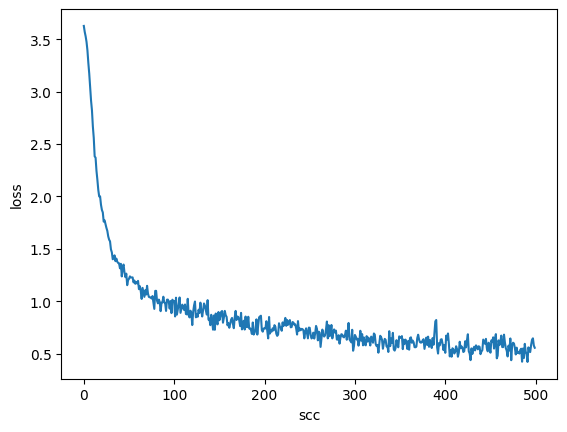

In [83]:
plot_loss(history)

In [84]:
def plot_accuracy(history):
    plt.plot(history.history['accuracy'], label='Loss')
    plt.ylabel('accuracy')
    plt.xlabel('scc')
    plt.legend
    plt.show

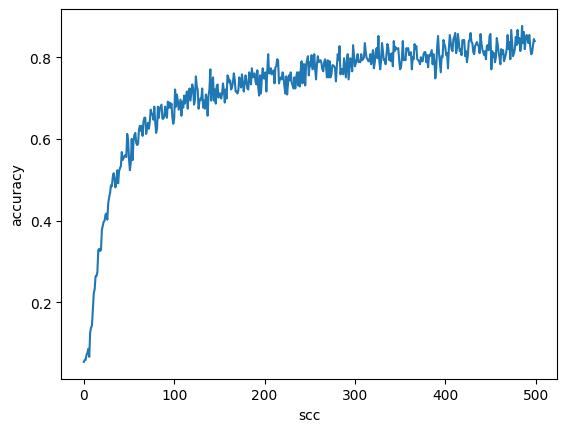

In [85]:
plot_accuracy(history)

In [89]:
infobot.save("school_infobot")

with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)
    
with open('label_encoder.pickle', 'wb') as ecn_file:
    pickle.dump(lbl_encoder, ecn_file, protocol=pickle.HIGHEST_PROTOCOL)

INFO:tensorflow:Assets written to: school_infobot\assets


INFO:tensorflow:Assets written to: school_infobot\assets
